# Curso: Clustering extraindo padrões de dados

## Objetivos:
* Descubra como validar e interpretar resultados com dados sem rótulos;
* Aprenda técnicas que irão te ajudar a interpretar informações de clusters;
* Extraia informações sobre o comportamento de clientes utilizando dados de uma empresa de cartão de crédito;
* Utilize o scikit-learn para gerar clusters e calcular diferentes métricas de validação;
* Entenda a matemática por trás das métricas de validação: silhouette, davies bouldin e calinski harabasz.

link: https://cursos.alura.com.br/course/cluster-analysis

## Importando as bibliotecas necessárias

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## Importando e analisando o dataset

In [5]:
url = 'https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
print(f'O dado possui {df.shape[0]} amostras e {df.shape[1]} atributos')

O dado possui 8950 amostras e 18 atributos


In [8]:
df.drop(['TENURE', 'CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [9]:
print(f'O dado possui {df.shape[0]} amostras e {df.shape[1]} atributos')

O dado possui 8950 amostras e 16 atributos


In [10]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [11]:
df.fillna(df.median(), inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [12]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [13]:
normalizacao = Normalizer()
values = normalizacao.fit_transform(df)
values_df = pd.DataFrame(values, columns=df.columns)
values_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.00000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.00002
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.00000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.00000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.00000


In [70]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values_df)
y_pred

array([0, 3, 0, ..., 0, 0, 4])

## Metricas de validação
* silhouette_score
* davies_bouldin_score
* calinski_harabasz_score

In [15]:
silhouette_score(values_df, y_pred)

0.3645268652444429

In [16]:
dbs = davies_bouldin_score(values_df, y_pred)
print(dbs)

1.0758562764119166


In [18]:
calinski = calinski_harabasz_score(values_df, y_pred)
print(calinski)

3431.788779759367


### Validando o cluster comparando as metricas para diferentes número de clusters

In [19]:
def clustering_algorithm(df, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(df)
    silhouette = silhouette_score(df, labels)
    dbs = davies_bouldin_score(df, labels)
    calinski = calinski_harabasz_score(df, labels)
    return silhouette, dbs, calinski


In [26]:
lst = range(2,21)
sc = []
dbs = []
calinski = []
for i in lst:
    s1, s2, s3 = clustering_algorithm(values_df, i)
    sc.append(s1)
    dbs.append(s2)
    calinski.append(s3)

In [27]:
sc

[0.299138657814818,
 0.32712253942757413,
 0.3481580237821136,
 0.3645412082353538,
 0.3648544574844091,
 0.3276687704732299,
 0.3093743663489414,
 0.3085867720846438,
 0.307167912756613,
 0.3032193879136124,
 0.308498167020393,
 0.2958933243665706,
 0.29926166367821444,
 0.30175149258038986,
 0.30088824256173385,
 0.26930580161368806,
 0.2948084795018211,
 0.2681596163155531,
 0.29381445566905734]

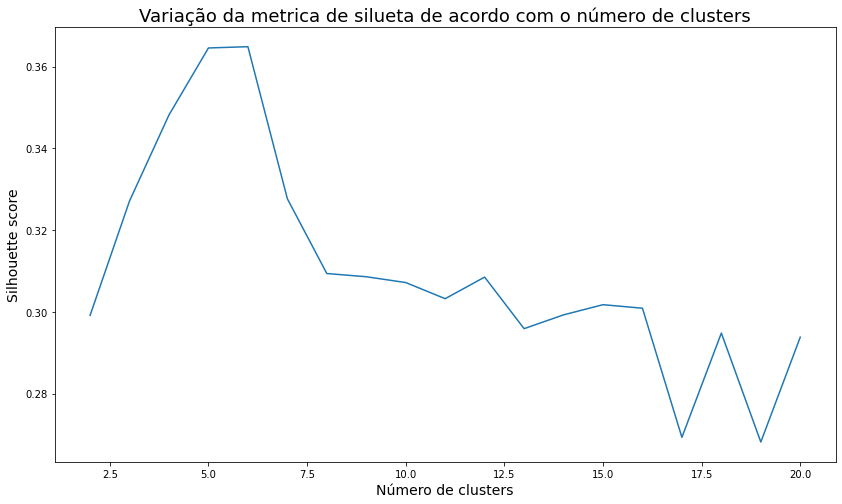

In [41]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(lst, sc)
ax.set_title('Variação da metrica de silueta de acordo com o número de clusters', fontsize=18)
ax.set_xlabel('Número de clusters', fontsize=14)
ax.set_ylabel('Silhouette score', fontsize=14)

plt.show()

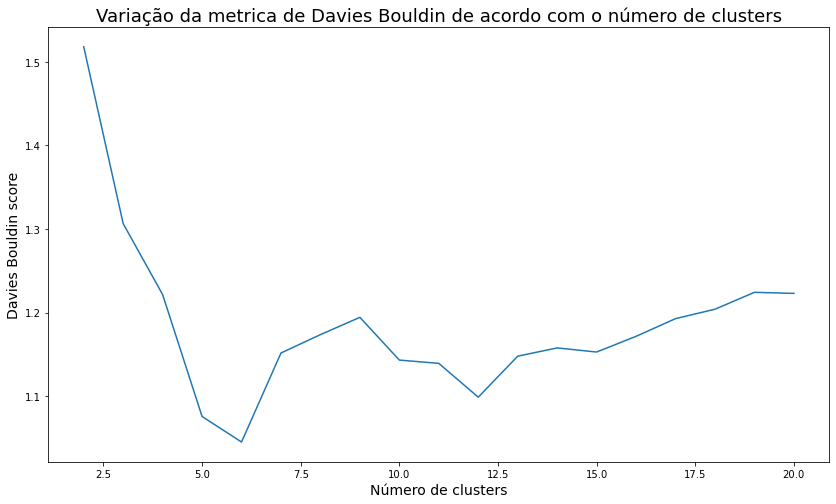

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(lst, dbs)
ax.set_title('Variação da metrica de Davies Bouldin de acordo com o número de clusters', fontsize=18)
ax.set_xlabel('Número de clusters', fontsize=14)
ax.set_ylabel('Davies Bouldin score', fontsize=14)

plt.show()

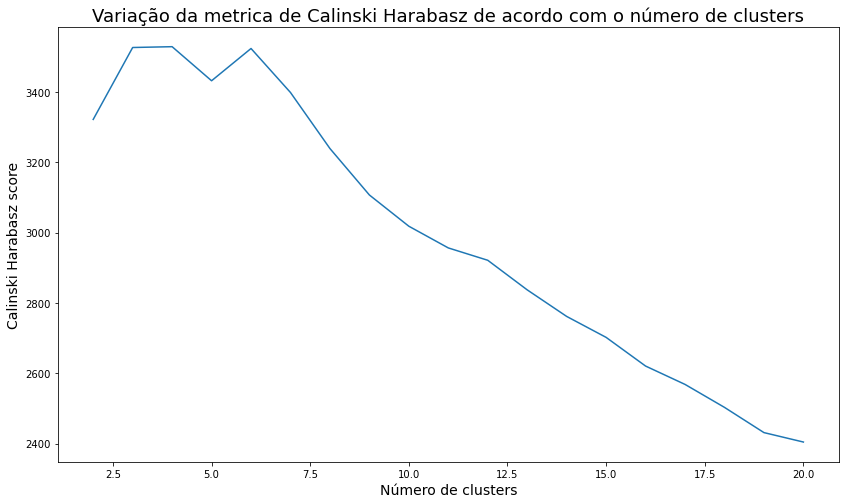

In [44]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(lst, calinski)
ax.set_title('Variação da metrica de Calinski Harabasz de acordo com o número de clusters', fontsize=18)
ax.set_xlabel('Número de clusters', fontsize=14)
ax.set_ylabel('Calinski Harabasz score', fontsize=14)

plt.show()

### Avaliando a estrutura do cluster a partir de um dataset criado aleatoriamente

In [69]:
random_values = np.random.rand(df.shape[0], df.shape[1])
silhouette, dbs, calinski = clustering_algorithm(random_values, 5)
print(silhouette, dbs, calinski)

0.03769792619207431 3.583084041248977 284.6494376022021


### Dividindo o df em 3 partes para verificar a estabilidade dos clusters

In [56]:
array_1, array_2, array_3 = np.array_split(values_df, 3)
s1, dbs1, c1 = clustering_algorithm(array_1, 5)
s2, dbs2, c2 = clustering_algorithm(array_2, 5)
s3, dbs3, c3 = clustering_algorithm(array_3, 5)
print(s1, s2, s3)
print(dbs1, dbs2, dbs3)
print(c1, c2, c3)
# É possível ver que as metricas são bem semelhantes para os 3 casos, ou seja, o cluster apresentar ser estavel

0.36892760732667484 0.3538037064965953 0.36693529107295353
1.0558332597484907 1.13949365826523 1.0991899016658433
1204.100909435797 1194.948634553892 1167.5326839969478


## Visualização os clusters

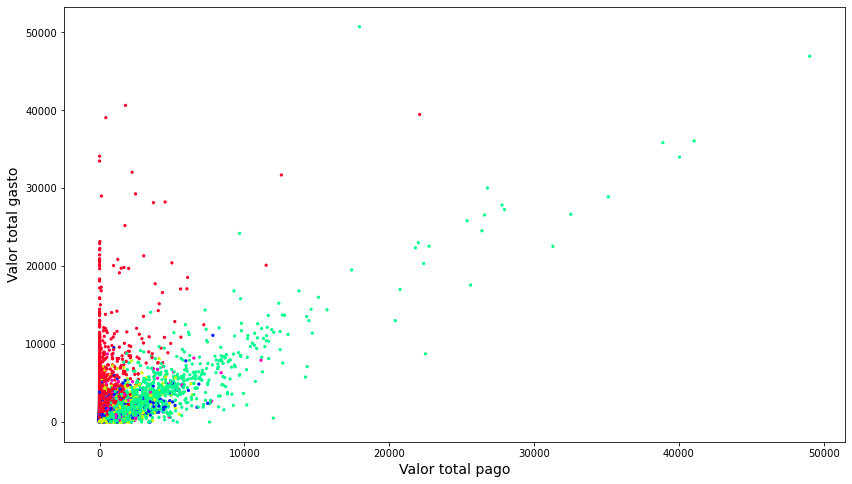

In [64]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(df['PURCHASES'], df['PAYMENTS'], c=y_pred, s=5, cmap='gist_rainbow')
ax.set_xlabel('Valor total pago', fontsize=14)
ax.set_ylabel('Valor total gasto', fontsize=14)
plt.show()

In [3]:
#df['clusters'] = y_pred
#sns.pairplot(data=df, hue='clusters')
#plt.show()

In [68]:
df.groupby('clusters').describe()

BALANCE                                                    \
           count         mean          std        min          25%   
clusters                                                             
0         1072.0  1794.024195  1982.950586   0.000000   506.925348   
1         3279.0   443.776995   846.525522   0.000000    23.340435   
2         1537.0  1143.200471  1665.090233   0.000000   212.282538   
3         2650.0  3036.946177  2478.922442   6.824905  1255.154881   
4          412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
clusters                                                                       
0         1087.920500  2308.762488  14581.459140            1072.0  0.862131   
1           82.902896   410.659944   9630.367575            3279.0  0.774514   
2          555.131027  1370.317105  19043.138560            1537.0  0.928267   
3         2173.994774  4223.858877  18495.558550            2650.0  0.963514   
4         1338.918346  2133.415063  11670.179850             412.0  0.989512   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
clusters  ...                                                             
0         ...       884.718306  21235.065300           1072.0  0.117384   
1         ...       248.766884   4483.503862           3279.0  0.246881   
2         ...       523.893953  18621.013310           1537.0  0.278258   
3         ...      1330.541571   8345.641905           2650.0  0.001798   
4         ...      7086.774783  76406.207520            412.0  0.019271   

                                                       
               std  min  25%       50%       75%  max  
clusters                                               
0         0.186853  0.0  0.0  0.083333  0.142857  1.0  
1         0.346775  0.0  0.0  0.000000  0.444444  1.0  
2         0.367029  0.0  0.0  0.083333  0.545455  1.0  
3         0.023256  0.0  0.0  0.000000  0.000000  0.6  
4         0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Os resultados **não** se mostraram satisfatórios, pois são muitos parametros. O ideal seria primeiro filtrar quais atributos são mais significativos para fazer a análise do cluster.

Para isso seguimos os seguintes passos:
* Calculamos a variância dos centroides dos clusters;
* Selecionamos os melhores atributos para servir de base para a interpretação.

In [73]:
centroids = kmeans.cluster_centers_
centroids

array([[6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
        1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
        9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05],
       [3.32972556e-01, 2.68240066e-04, 1.58923673e-01, 3.62178588e-02,
        1.23089552e-01, 5.82140753e-02, 1.66817881e-04, 2.64295391e-05,
        1.47135264e-04, 1.92748591e-05, 4.26896159e-04, 3.86195702e-03,
        3.76646957e-01, 2.52402941e-01, 6.79571553e-01, 4.22964707e-06],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [2.35130689e-01, 2.16418717e-04, 6.04525670e-02, 3.44569238e-02,
        2.60008529e-02, 3.99755165e-01, 5.26563547e-05, 2.052

In [80]:
max = len(centroids[0])
d = {}
for i in range(max):
    d.update({values_df.columns.values[i]: centroids[:, i].var()})
d

{'BALANCE': 0.022416082929598923,
 'BALANCE_FREQUENCY': 4.571809856697515e-10,
 'PURCHASES': 0.019666478157467415,
 'ONEOFF_PURCHASES': 0.007666150140596276,
 'INSTALLMENTS_PURCHASES': 0.003580834693992535,
 'CASH_ADVANCE': 0.022512555390090852,
 'PURCHASES_FREQUENCY': 3.720127135629643e-09,
 'ONEOFF_PURCHASES_FREQUENCY': 6.429572248780241e-10,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 2.7104680230257637e-09,
 'CASH_ADVANCE_FREQUENCY': 6.03345563785073e-10,
 'CASH_ADVANCE_TRX': 3.3066084029567787e-07,
 'PURCHASES_TRX': 3.4248441326008392e-06,
 'CREDIT_LIMIT': 0.03599080047591163,
 'PAYMENTS': 0.0279652379866705,
 'MINIMUM_PAYMENTS': 0.05420438855922285,
 'PRC_FULL_PAYMENT': 1.0483107193096965e-09}

In [97]:
{key: value for (key,value) in d.items() if value >=0.01}.keys()

dict_keys(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'])

In [103]:
df_com_atributos_de_interesse = df[{key: value for (key,value) in d.items() if value >=0.01}.keys()]
df_com_atributos_de_interesse['clusters'] = y_pred
df_com_atributos_de_interesse

C:\Users\guilh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,clusters
0,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,0
1,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,3
2,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,0
3,1666.670542,1499.00,205.788017,7500.0,0.000000,312.343947,0
4,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,2
...,...,...,...,...,...,...,...
8945,28.493517,291.12,0.000000,1000.0,325.594462,48.886365,0
8946,19.183215,300.00,0.000000,1000.0,275.861322,312.343947,0
8947,23.398673,144.40,0.000000,1000.0,81.270775,82.418369,0
8948,13.457564,0.00,36.558778,500.0,52.549959,55.755628,0


In [108]:
df_analise = df_com_atributos_de_interesse.groupby('clusters').mean()
df_analise['n_clients'] = df_com_atributos_de_interesse.groupby('clusters').size()
df_analise

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,n_clients
clusters,,,,,,,
0,443.746756,629.249107,141.482978,5130.547795,814.294226,228.519011,3280
1,1987.146873,858.326286,420.107194,2226.699029,1338.974045,6032.349113,412
2,3037.962543,385.248630,1636.917210,4495.771989,968.890376,1022.143477,2649
3,1795.328292,476.810531,3267.199032,3982.452201,4713.384730,734.167995,1073
4,1141.865757,3274.071901,183.496011,4098.802182,3037.137165,541.422553,1536


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.Bons pagadores. Maior número de clientes. 
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.Piores pagadores.Boa quantidade de clientes.
CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores. 
CLUSTER 3: Clientes que gastam muito com saques. Pagam às vezes.
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes

In [110]:
df.groupby("clusters")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
1,3279.0,0.246881,0.346775,0.0,0.0,0.000000,0.444444,1.0
2,1537.0,0.278258,0.367029,0.0,0.0,0.083333,0.545455,1.0
3,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
